Necessary libraries




In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import shap

#from google.colab import files

from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  GridSearchCV
from sklearn.model_selection import ParameterGrid

from sklearn.linear_model import LinearRegression , ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.linear_model import Ridge,Lasso
from sklearn.cross_decomposition import PLSRegression


from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif , f_regression


from sklearn.manifold import TSNE, Isomap , LocallyLinearEmbedding
from sklearn.decomposition import PCA

# Import eigh method for calculating eigenvalues and eigenvectirs
from numpy.linalg import eigh

#from pycaret.regression import *

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install statsmodels

  Using cached statsmodels-0.14.0-cp310-cp310-win_amd64.whl (9.2 MB)
     ---------------------------------------- 0.0/233.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/233.8 kB ? eta -:--:--
     - -------------------------------------- 10.2/233.8 kB ? eta -:--:--
     - -------------------------------------- 10.2/233.8 kB ? eta -:--:--
     ---- -------------------------------- 30.7/233.8 kB 262.6 kB/s eta 0:00:01
     ---- -------------------------------- 30.7/233.8 kB 262.6 kB/s eta 0:00:01
     ---- -------------------------------- 30.7/233.8 kB 262.6 kB/s eta 0:00:01
     ------ ------------------------------ 41.0/233.8 kB 140.9 kB/s eta 0:00:02
     ------ ------------------------------ 41.0/233.8 kB 140.9 kB/s eta 0:00:02
     --------- --------------------------- 61.4/233.8 kB 142.6 kB/s eta 0:00:02
     --------- --------------------------- 61.4/233.8 kB 142.6 kB/s eta 0:00:02
     --------- --------------------------- 61.4/233.8 kB 142.6 kB/s eta 0:00:

***Regression Models***

In [3]:
#split and scale data
def split_and_scale_data(x, y, test_size=0.2, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test, y_train, y_test

##CV=5:

#lR
def Linear_regression_model(X_train, y_train, X_test, y_test):
    regression_model = LinearRegression()
    regression_model.fit(X_train, y_train)
    y_pred = regression_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    y_train_pred = regression_model.predict(X_train)
    r2_train = r2_score(y_train, y_train_pred)
    evaluation_metrics = {'R-squared Score (Test Set)': r2,
        'R-squared Score (Train Set)': r2_train,
        #'Mean Absolute Error': mae,
        #'Mean Squared Error': mse,
        'RMSE': rmse}
    return evaluation_metrics

#elasticnet
def elastic_net(X_train, y_train, X_test, y_test):
    elastic_net = ElasticNet()
    param_grid = {
        'alpha': [0.1, 0.5, 1.0],
        'l1_ratio': [0.2, 0.5, 0.8] }
    grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    best_alpha = grid_search.best_params_['alpha']
    best_l1_ratio = grid_search.best_params_['l1_ratio']

    model = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio)
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    r2_train = r2_score(y_train, y_pred_train)

    y_pred_test = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_test)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)

    evaluation_metrics = {'R-squared Score (Test Set)': r2_test,
        'R-squared Score (Train Set)': r2_train,
      #  "Best Hyperparameters": grid_search.best_params_,
       # 'Mean Absolute Error': mae,
        #'Mean Squared Error': mse,
        'RMSE': rmse}
    return evaluation_metrics

#svm_regression
def svm_regression(X_train, y_train, X_test, y_test):
    model = SVR()
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse = np.sqrt(mse_test)
    mae = mean_absolute_error(y_test, y_pred_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    evaluation_metrics = {'R-squared Score (Test Set)': r2_test,
                          'R-squared Score (Train Set)': r2_train,
        #'Mean Absolute Error': mae,
        #'Mean Squared Error (Test Set)': mse_test,
        'RMSE (Test Set)': rmse,
        #'Mean Squared Error (Train Set)': mse_train
    }
    return evaluation_metrics

#knn regression
def knn_regression(X_train, y_train, X_test, y_test):
    param_grid = {'n_neighbors': [3, 5, 7, 9],
                  'weights': ['uniform', 'distance'],
                  'p': [1, 2,3,4,5,6,7,10],
                  'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
                  #,'metric':['Euclidean', 'Minkowski',  'Manhattan']}
    knn = KNeighborsRegressor()
    grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, np.ravel(y_train))
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(np.ravel(y_test), y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(np.ravel(y_test), y_pred)
    r2 = r2_score(np.ravel(y_test), y_pred)
    y_pred_train = best_model.predict(X_train)
    r2_train = r2_score(y_train, y_pred_train)
    evaluation_metrics = {
        'R-squared Score (Test)': r2,
        'R-squared Score (Train)': r2_train,
        #"Best Hyperparameters": grid_search.best_params_,

        #'Mean Absolute Error': mae,
        #'Mean Squared Error': mse,
        'RMSE': rmse
    }
    return evaluation_metrics


#RF
def random_forest_regression(X_train, y_train, X_test, y_test):
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    model = RandomForestRegressor(random_state=42)
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, np.ravel(y_train))
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    y_pred_train = best_model.predict(X_train)
    r2_train = r2_score(y_train, y_pred_train)
    evaluation_metrics = {
        'R-squared Score ( Test)': r2,
        'R-squared Score (Train)': r2_train,
        #"Best Hyperparameters": grid_search.best_params_,
        #'Mean Absolute Error': mae,
        #'Mean Squared Error': mse,
        'RMSE': rmse
        }
    return evaluation_metrics

#dt
def decision_tree_regression(X_train, y_train, X_test, y_test):
    param_grid = {
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    model = DecisionTreeRegressor(random_state=42)
    grid_search = GridSearchCV(model, param_grid, cv=5 )  #, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, np.ravel(y_train))
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    y_pred_train = best_model.predict(X_train)
    r2_train = r2_score(y_train, y_pred_train)
    evaluation_metrics = {'R-squared Score ( Test)': r2,
        'R-squared Score (Train)': r2_train,
        "Best Hyperparameters": grid_search.best_params_,
        'Mean Absolute Error': mae,
       'Mean Squared Error': mse,
        'RMSE': rmse
    }
    return evaluation_metrics

#gbr
def gradient_boosting_regression(X_train, y_train, X_test, y_test):
    param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.1, 0.05, 0.01],
        'max_depth': [3, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    model = GradientBoostingRegressor(random_state=42)
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train, np.ravel(y_train))
    best_model = grid_search.best_estimator_

    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    y_pred_train = best_model.predict(X_train)
    r2_train = r2_score(y_train, y_pred_train)
    evaluation_metrics = {'R-squared Score ( Test)': r2,
        'R-squared Score (Train)': r2_train,
        #"Best Hyperparameters": grid_search.best_params_,
        #'Mean Absolute Error': mae,
       # 'Mean Squared Error': mse,
        'RMSE': rmse
    }

    return evaluation_metrics

#ridge
def ridge_regression(X_train, y_train, X_test, y_test):

    param_grid = {
        'alpha': [0.1, 1.0, 10.0],
        'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
        'tol': [0.0001, 0.001, 0.01]
    }

    model = Ridge(random_state=42)
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train, np.ravel(y_train))
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    y_pred_train = best_model.predict(X_train)
    r2_train = r2_score(y_train, y_pred_train)
    #r2_train = best_model.score(X_train, y_train)
    evaluation_metrics = {'R-squared Score ( Test)': r2,
        'R-squared Score (Train)': r2_train,
        #"Best Hyperparameters": grid_search.best_params_,
        #'Mean Absolute Error': mae,
       # 'Mean Squared Error': mse,
        'RMSE': rmse
    }
    return evaluation_metrics

#lasso
def lasso_regression(X_train, y_train, X_test, y_test):
    param_grid = {
        'alpha': [0.1, 1.0, 10.0],
        'tol': [0.0001, 0.001, 0.01]
    }
    model = Lasso(random_state=42)
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train, np.ravel(y_train))
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    y_pred_train = best_model.predict(X_train)
    r2_train = r2_score(y_train, y_pred_train)
    evaluation_metrics = {
        'R-squared Score (Test)': r2,
        'R-squared Score (Train)': r2_train,
        'Mean Absolute Error': mae,
        'Mean Squared Error': mse,
        'Root Mean Squared Error': rmse
    }
    return evaluation_metrics

In [4]:
#split and scale data
def split_and_scale_data(x, y, test_size=0.2, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test, y_train, y_test



##CV=off

def gb(X_train, y_train, X_test, y_test):
    hyperparameters = {
        'learning_rate': [0.1, 0.01, 0.001],
        'n_estimators': [100, 500, 1000],
        'max_depth': [3, 5, 7]
    }

    model = GradientBoostingRegressor()

    param_grid = ParameterGrid(hyperparameters)
    best_score = float('-inf')
    best_params = None
    best_model = None

    for params in param_grid:
        model.set_params(**params)
        model.fit(X_train, np.ravel(y_train))

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)

        rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
        rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

        if r2_test > best_score:
            best_score = r2_test
            best_params = params
            best_model = model

    results = {
        "best_params": best_params,
        "best_r2_score_test": best_score,
        "best_r2_score_train": r2_train,
        "rmse_train": rmse_train,
        "rmse_test": rmse_test
    }

    return results


def KNN(X_train, y_train, X_test, y_test):

    #hyperparameters
    hyperparameters = {'n_neighbors': [3, 5, 7, 9],
                      'weights': ['uniform', 'distance'],
                      'p': [1, 2],
                      'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

    param_grid = ParameterGrid(hyperparameters)
    best_score = float('-inf')
    best_params = None
    best_model = None

    for params in param_grid:
        model = KNeighborsRegressor()
        model.set_params(**params)
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)

        rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
        rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

        if r2_test > best_score:
            best_score = r2_test
            best_params = params
            best_model = model

    results = {
        "best_params": best_params,
        "best_r2_score_test": best_score,
        "best_r2_score_train": r2_train,
        "rmse_train": rmse_train,
        "rmse_test": rmse_test
    }

    return results




def ridge(X_train, y_train, X_test, y_test):
    hyperparameters = {
        'alpha': [0.1, 1.0, 10.0],
        'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
    }

    model = Ridge()

    param_grid = ParameterGrid(hyperparameters)
    best_score = float('-inf')
    best_params = None
    best_model = None

    for params in param_grid:
        model.set_params(**params)
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)

        rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
        rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

        if r2_test > best_score:
            best_score = r2_test
            best_params = params
            best_model = model

    print("Best Parameters:", best_params)
    print("Best r2 Score (Test Set):", best_score)
    print("Best r2 Score (Train Set):", r2_train)

    print("RMSE (Train Set):", rmse_train)
    print("RMSE (Test Set):", rmse_test)


def ElasticNet(X_train, y_train, X_test, y_test):
    model = ElasticNet()

    # Specify hyperparameters
    hyperparameters = {
        'alpha': [0.1, 0.01, 0.001],
        'l1_ratio': [0.1, 0.5, 0.9]
    }

    param_grid = ParameterGrid(hyperparameters)
    best_score = float('-inf')
    best_params = None
    best_model = None

    for params in param_grid:
        model.set_params(**params)
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)

        rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
        rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

        if r2_test > best_score:
            best_score = r2_test
            best_params = params
            best_model = model

    print("Best Parameters:", best_params)
    print("Best r2 Score (Test Set):", best_score)
    print("Best r2 Score (Train Set):", r2_train)
    print("RMSE (Train Set):", rmse_train)
    print("RMSE (Test Set):", rmse_test)


def RF(X_train, y_train, X_test, y_test):

    #hyperparameters
    hyperparameters = { 'n_estimators': [100, 200, 300],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
                           }

    param_grid = ParameterGrid(hyperparameters)
    best_score = float('-inf')
    best_params = None
    best_model = None

    for params in param_grid:
        model = RandomForestRegressor()
        model.set_params(**params)
        model.fit(X_train, np.ravel(y_train))

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)

        rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
        rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
        
        if r2_test > best_score:
            best_score = r2_test
            best_params = params
            best_model = model

    results = {
        "best_params": best_params,
        "best_r2_score_test": best_score,
        "best_r2_score_train": r2_train,
        "rmse_train": rmse_train,
        "rmse_test": rmse_test
    }

    return results


def DT(X_train, y_train, X_test, y_test):

    #hyperparameters
    hyperparameters = {
    'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
                           }

    param_grid = ParameterGrid(hyperparameters)
    best_score = float('-inf')
    best_params = None
    best_model = None

    for params in param_grid:
        model = DecisionTreeRegressor()
        model.set_params(**params)
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)

        rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
        rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

        if r2_test > best_score:
            best_score = r2_test
            best_params = params
            best_model = model

    results = {
        "best_params": best_params,
        "best_r2_score_test": best_score,
        "best_r2_score_train": r2_train,
        "rmse_train": rmse_train,
        "rmse_test": rmse_test
    }

    return results


def Lasso(X_train, y_train, X_test, y_test):

    #hyperparameters
    hyperparameters = {
    'alpha': [0.1, 1.0, 10.0],
    'tol': [1e-4, 1e-3, 1e-2],
    'max_iter': [1000, 2000, 3000]
}


    param_grid = ParameterGrid(hyperparameters)
    best_score = float('-inf')
    best_params = None
    best_model = None

    for params in param_grid:
        model = Lasso()
        model.set_params(**params)
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)

        rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
        rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

        if r2_test > best_score:
            best_score = r2_test
            best_params = params
            best_model = model

    results = {
        "best_params": best_params,
        "best_r2_score_test": best_score,
        "best_r2_score_train": r2_train,
        "rmse_train": rmse_train,
        "rmse_test": rmse_test
    }

    return results


#print('KNN',KNN(X_train, y_train, X_test, y_test))
#print('GBR',gb(X_train, y_train, X_test, y_test))
#print('RF',RF(X_train, y_train, X_test, y_test))
#print('DT',DT(X_train, y_train, X_test, y_test))
#print('Lasso',Lasso(X_train, y_train, X_test, y_test))
#print('Ridge',ridge(X_train, y_train, X_test, y_test))
#print('Elasticnet',ElasticNet(X_train, y_train, X_test, y_test))

#**Dataset**

In [ ]:
#File=files.upload() #xrd_new.xlsx

In [5]:
#Encoding method 1
df=pd.read_excel(r'C:\Users\Asus\Desktop/xrd_new.xlsx', sheet_name='Sheet6')
df=df.drop('Isc',axis=1)
#df=>27 rows × 32 columns

In [6]:
#Encoding method 2 (OHE)
df1=pd.read_excel(r'C:\Users\Asus\Desktop\xrd_new.xlsx', sheet_name='sheet1')
#df1=pd.get_dummies(df1, columns=['DROP'])


encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(df1[['DROP']])
feature_names = [f'{col}_{value}' for col, values in zip(df1[['DROP']], encoder.categories_) for value in values]
df_encoded= pd.DataFrame(encoded_data, columns=feature_names)
df1 = pd.concat([df1, df_encoded], axis=1)
df1=df1.drop(['DROP','Isc'],axis=1)
#df1=>27 rows × 58 columns

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


In [7]:
##Encoding method 3 => ordinal encoding

df2=df.copy()
encoder = OrdinalEncoder()

data = [[value] for value in [1,2,3,4,5,6,1,2,3,1,2,3,4,5,6,1,2,3,4,5,6,1,2,3,4,5,6]]

encoded_data = encoder.fit_transform(data)

df2['DROP'] = encoded_data.flatten()

**Best regression result**

*📌df*

*CV=5*

In [8]:
x=df.drop(['FF', 'schw 1', 'schw 2','schw 3', 'schw 4', 'schw 5', 'schw 6'], axis=1)
y=df[['FF']]

X_train, X_test, y_train, y_test = split_and_scale_data(x, y, test_size=0.2, random_state=78)

print('ridge_regression result :' , ridge_regression(X_train, y_train, X_test, y_test))
print('------------------')
print('gbr result:'               ,gradient_boosting_regression(X_train, y_train, X_test, y_test))
print('------------------')
print('knn_regression result :', knn_regression(X_train, y_train, X_test, y_test))
print('------------------')
print('🚀','RF_regression result :' , random_forest_regression(X_train, y_train, X_test, y_test))

ridge_regression result : {'R-squared Score ( Test)': 0.43240709634411634, 'R-squared Score (Train)': 0.5834201166139767, 'RMSE': 1.3172809766659321}
------------------
gbr result: {'R-squared Score ( Test)': 0.6350333651249318, 'R-squared Score (Train)': 0.8636310225388169, 'RMSE': 1.0562981596931749}
------------------
knn_regression result : {'R-squared Score (Test)': 0.6766369975952475, 'R-squared Score (Train)': 1.0, 'RMSE': 0.9942717631632594}
------------------
🚀 RF_regression result : {'R-squared Score ( Test)': 0.8300610149968217, 'R-squared Score (Train)': 0.875625677536865, 'RMSE': 0.7207861807401549}


💡 Analyses such as Feature Importance and SHAP Values will be carried out based on the superior performance of Random Forest compared to other models observed in this data.💡



*CV= Off*

In [ ]:
x=df.drop(['FF', 'schw 1', 'schw 2','schw 3', 'schw 4', 'schw 5', 'schw 6'], axis=1)
y=df[['FF']]

X_train, X_test, y_train, y_test = split_and_scale_data(x, y, test_size=0.2, random_state=78)

In [ ]:
#KNN
KNN(X_train, y_train, X_test, y_test)

{'best_params': {'algorithm': 'auto',
  'n_neighbors': 3,
  'p': 1,
  'weights': 'uniform'},
 'best_r2_score_test': 0.8496185275031811,
 'best_r2_score_train': 0.9999999999999457,
 'rmse_train': 5.915399886291179e-07,
 'rmse_test': 0.8228644831274561}

In [ ]:
#GBR
gb(X_train, y_train, X_test, y_test)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best r2 Score (Test Set): 0.7235554629555763
Best r2 Score (Train Set): 0.8648000746024985
RMSE (Train Set): 0.9331213298755352
RMSE (Test Set): 1.619730102650844


**📌df1**

In [ ]:
x=df1.drop(['FF', 'schw 1', 'schw 2','schw 3', 'schw 4', 'schw 5', 'schw 6'], axis=1)
y=df1[['FF']]

X_train, X_test, y_train, y_test = split_and_scale_data(x, y, test_size=0.2, random_state=78)

CV=5

In [ ]:
print('ridge_regression result :' , ridge_regression(X_train, y_train, X_test, y_test))
print('------------------')
print('Linear_regression result:',Linear_regression_model(X_train, y_train, X_test, y_test))
print('------------------')
print('knn_regression result :', knn_regression(X_train, y_train, X_test, y_test))

ridge_regression result : {'R-squared Score ( Test)': 0.7564156688554828, 'R-squared Score (Train)': 0.9294139782176705, 'RMSE': 0.86294797848063}
------------------
Linear_regression result: {'R-squared Score (Test Set)': 0.7696611645470373, 'R-squared Score (Train Set)': 1.0, 'RMSE': 0.8391575859745528}
------------------
knn_regression result : {'R-squared Score (Test)': 0.8451842545989807, 'R-squared Score (Train)': 0.9999999999999942, 'RMSE': 0.687966839785915}


CV=*off*

In [ ]:
#KNN
KNN(X_train, y_train, X_test, y_test)

{'best_params': {'algorithm': 'auto',
  'n_neighbors': 3,
  'p': 1,
  'weights': 'uniform'},
 'best_r2_score_test': 0.8567787526070298,
 'best_r2_score_train': 0.9999999999999317,
 'rmse_train': 6.629838840333349e-07,
 'rmse_test': 1.2845225896479606}

In [ ]:
#ridge
ridge(X_train, y_train, X_test, y_test)

Best Parameters: {'alpha': 0.1, 'solver': 'sag'}
Best r2 Score (Test Set): 0.7696509459372112
Best r2 Score (Train Set): 0.9367104293749633
RMSE (Train Set): 0.6384339384677751
RMSE (Test Set): 0.8632518188570905


In [ ]:
#ElasticNet
#ElasticNet(X_train, y_train, X_test, y_test)

📌df2

In [ ]:
x=df2.drop(['FF', 'schw 1', 'schw 2','schw 3', 'schw 4', 'schw 5', 'schw 6'], axis=1)
y=df2[['FF']]

X_train, X_test, y_train, y_test = split_and_scale_data(x, y, test_size=0.2, random_state=78)

CV=5

In [ ]:
print('gbr result:',              gradient_boosting_regression(X_train, y_train, X_test, y_test))
print('------------------')
print('knn_regression result :', knn_regression(X_train, y_train, X_test, y_test))
print('------------------')
print('RF_regression result :' , random_forest_regression(X_train, y_train, X_test, y_test))

gbr result: {'R-squared Score ( Test)': 0.6350333651249318, 'R-squared Score (Train)': 0.8636310225388169, 'RMSE': 1.0562981596931749}
------------------
knn_regression result : {'R-squared Score (Test)': 0.6766369975952475, 'R-squared Score (Train)': 1.0, 'RMSE': 0.9942717631632594}
------------------
RF_regression result : {'R-squared Score ( Test)': 0.8300610149968217, 'R-squared Score (Train)': 0.875625677536865, 'RMSE': 0.7207861807401549}


In [ ]:
#KNN
KNN(X_train, y_train, X_test, y_test)

{'best_params': {'algorithm': 'auto',
  'n_neighbors': 3,
  'p': 1,
  'weights': 'uniform'},
 'best_r2_score_test': 0.8496185275031811,
 'best_r2_score_train': 0.9999999999999457,
 'rmse_train': 5.915399886291179e-07,
 'rmse_test': 0.8228644831274561}

In [ ]:
#GBR
gb(X_train, y_train, X_test, y_test)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best r2 Score (Test Set): 0.7387852598321127
Best r2 Score (Train Set): 0.8648000746024985
RMSE (Train Set): 0.9331213298755352
RMSE (Test Set): 1.6252186866337186


**➕PCA**

In [ ]:
#find the number of all components after applying PCA
def get_num_components(data):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)

    pca = PCA()
    x_pca = pca.fit_transform(data_scaled)

    num_components = len(pca.explained_variance_ratio_)

    return num_components

In [ ]:
def analyze_principal_components(x,n,f,a,b):#x=data   ,n= variance% to capture ,   f=col number  , (a,b)=>fig size
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(x)

    model = PCA(n_components=n).fit(data_scaled)
    X_pc = model.transform(data_scaled)

    n_pcs = model.components_.shape[0]


    indices = np.argsort(np.abs(model.components_))[:, ::-1][:, :f]

    # Get the names of the most important features
    feature_names = np.array(x.columns)

    # Create a dictionary to store the PC number and corresponding feature names
    pc_dict = {'PC{}'.format(i+1): feature_names[indices[i]].tolist() for i in range(n_pcs)}

    # Convert the dictionary to a DataFrame
    pc_df = pd.DataFrame(pc_dict.items(), columns=['Principal Component', 'feature contributions in descending order'])

    # Calculate explained variance ratio
    explained_variance_ratio = model.explained_variance_ratio_

    # Plot feature contribution for each Principal Component
    for i in range(len(explained_variance_ratio)):
        plt.figure(figsize=(a, b))
        plt.bar(feature_names, np.abs(model.components_[i])*100)
        plt.title(f'Feature Contribution for Principal Component {i+1}')
        plt.xlabel('Features')
        plt.ylabel('Contribution')
        plt.show()

    return pc_df

In [ ]:
#1️⃣
def visualize_variance_pca(x):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(x)

    pca = PCA()
    X_train_pca = pca.fit_transform(data_scaled)

    # Determine explained variance using explained_variance_ratio_ attribute
    exp_var_pca = pca.explained_variance_ratio_

    # Cumulative sum of eigenvalues; This will be used to create step plot
    # for visualizing the variance explained by each principal component.
    cum_sum_eigenvalues = np.cumsum(exp_var_pca)

    # Create the visualization plot
    plt.bar(range(0, len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
    plt.step(range(0, len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal component index')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()



#2️⃣
def plot_explained_variance(x):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(x)

    # Determine covariance matrix
    cov_matrix = np.cov(data_scaled, rowvar=False)

    # Determine eigenvalues and eigenvectors
    egnvalues, egnvectors = eigh(cov_matrix)

    # Determine explained variance
    total_egnvalues = sum(egnvalues)
    var_exp = [(i/total_egnvalues) for i in sorted(egnvalues, reverse=True)]

    # Plot the explained variance against cumulative explained variance
    cum_sum_exp = np.cumsum(var_exp)
    plt.bar(range(0,len(var_exp)), var_exp, alpha=0.5, align='center', label='Individual explained variance')
    plt.step(range(0,len(cum_sum_exp)), cum_sum_exp, where='mid',label='Cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal component index')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

📌df

In [ ]:
x=df.drop(['FF', 'schw 1', 'schw 2','schw 3', 'schw 4', 'schw 5', 'schw 6'], axis=1)
y=df[['FF']]

In [ ]:
x.shape

(27, 25)

In [ ]:
get_num_components(x)

25

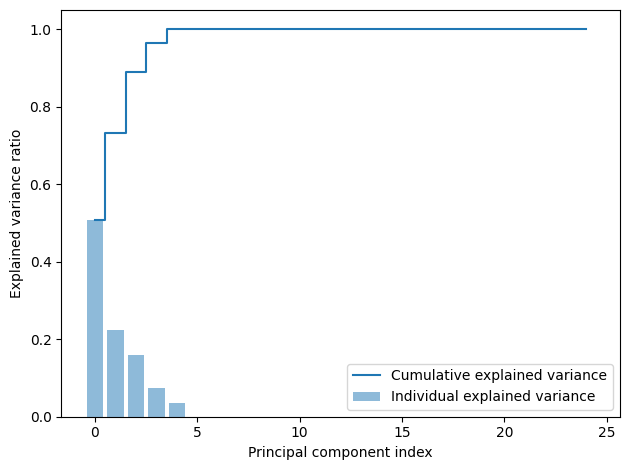

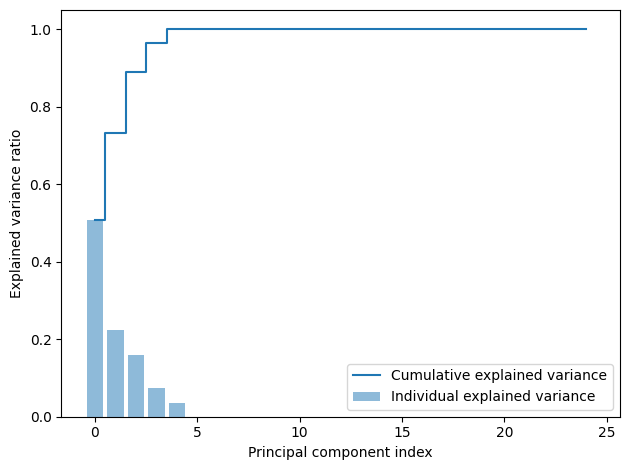

None
None


In [ ]:
output1 = visualize_variance_pca(x)
output2 = plot_explained_variance(x)
print(output1)
print(output2)

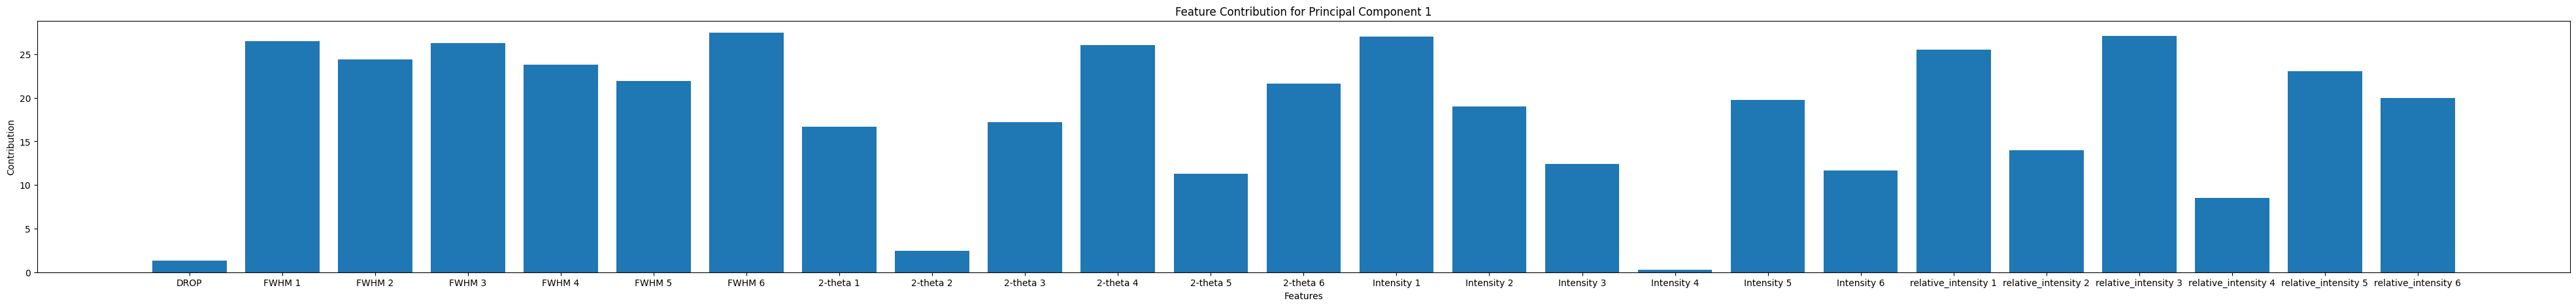

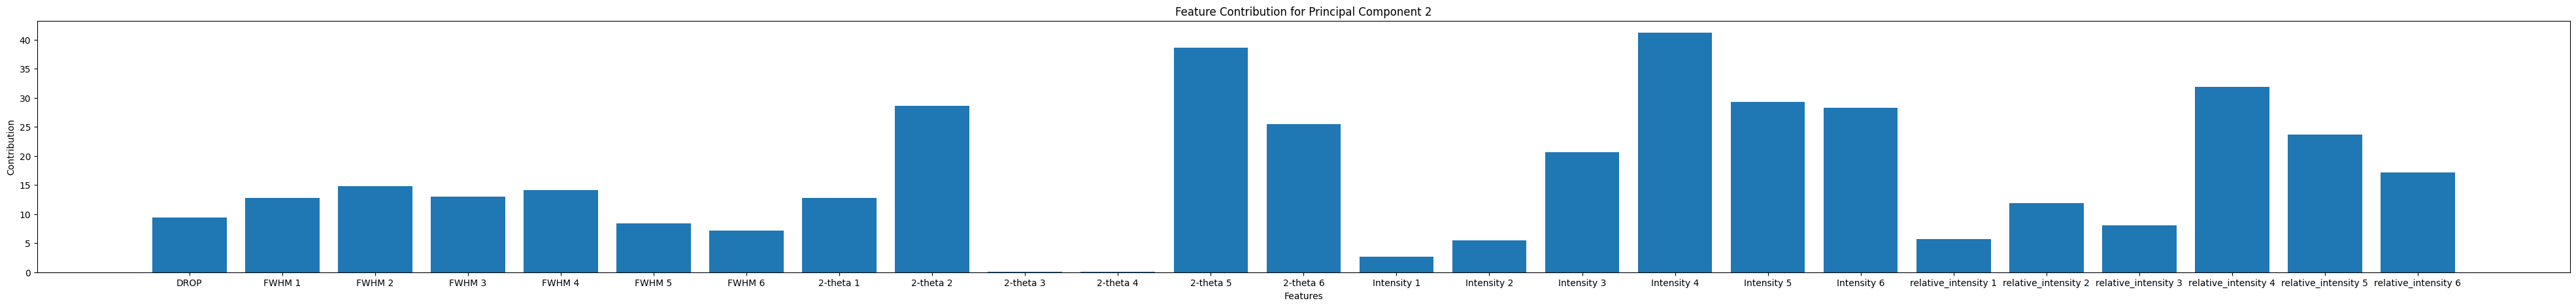

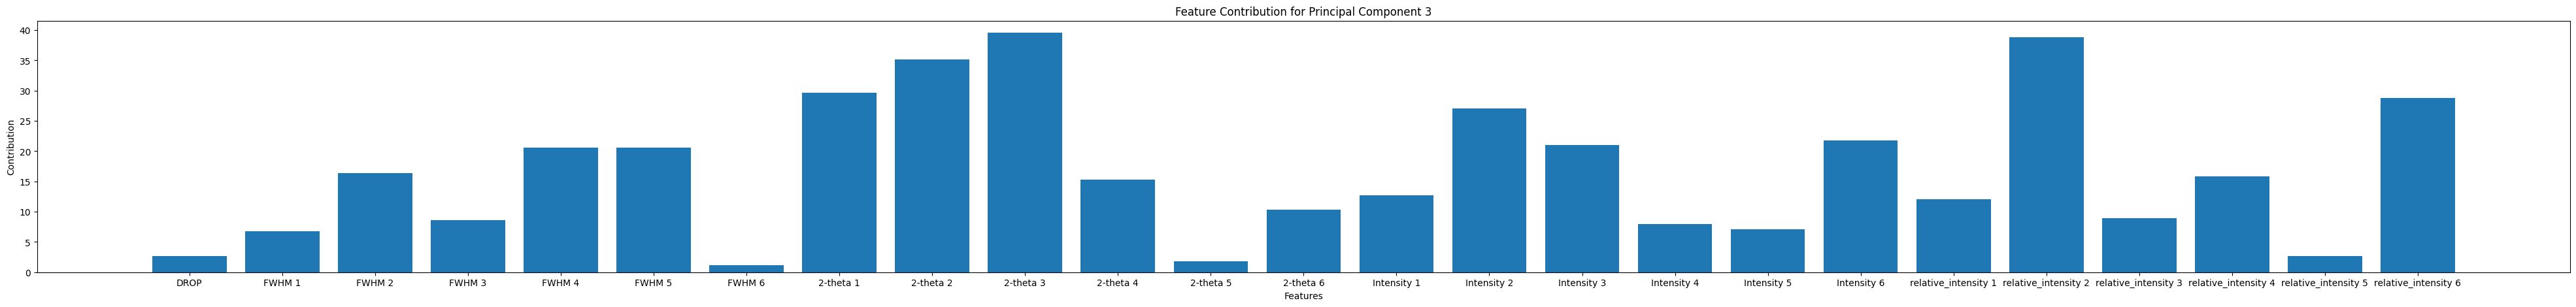

,Principal Component,feature contributions in descending order
0,PC1,"[FWHM 6, relative_intensity 3, Intensity 1, FW..."
1,PC2,"[Intensity 4, 2-theta 5, relative_intensity 4,..."
2,PC3,"[2-theta 3, relative_intensity 2, 2-theta 2, 2..."


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Principal Component').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
analyze_principal_components( x, 0.75 , 25 , 50, 5 )# x=data   , n= variance% to capture ,   f=col number  , (a,b)=>fig size

📌df1

In [ ]:
x=df1.drop(['FF', 'schw 1', 'schw 2','schw 3', 'schw 4', 'schw 5', 'schw 6'], axis=1)
y=df1[['FF']]

In [ ]:
x.shape

(27, 51)

In [ ]:
get_num_components(x)

27

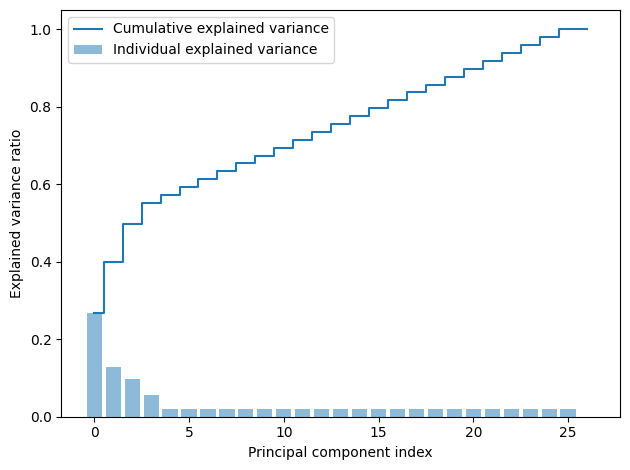

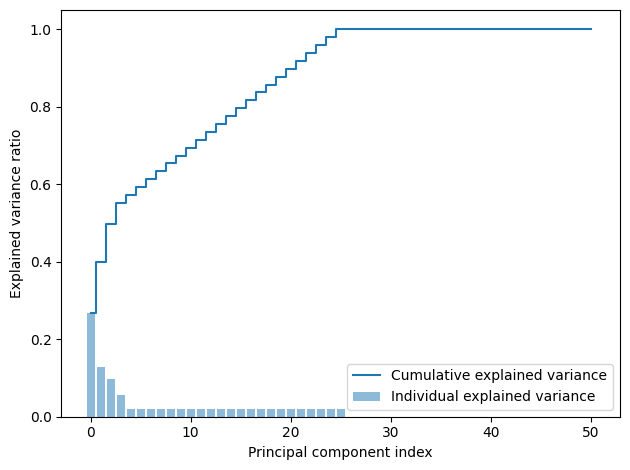

None
None


In [ ]:
output1 = visualize_variance_pca(x)
output2 = plot_explained_variance(x)
print(output1)
print(output2)

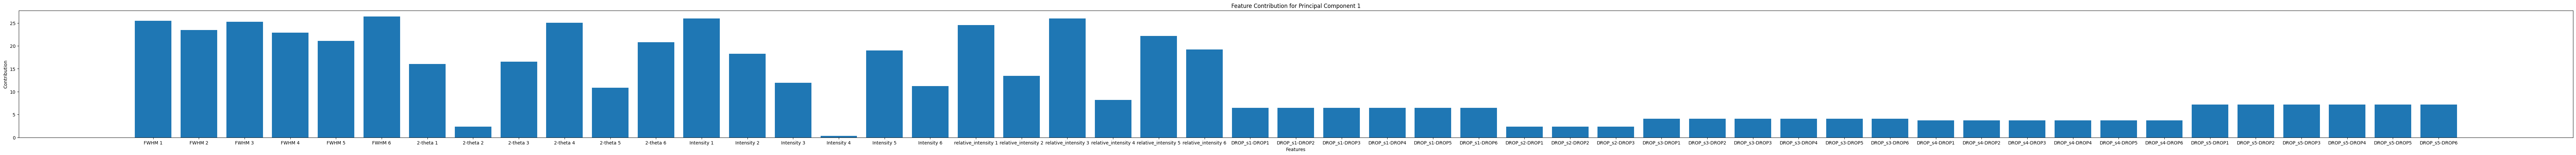

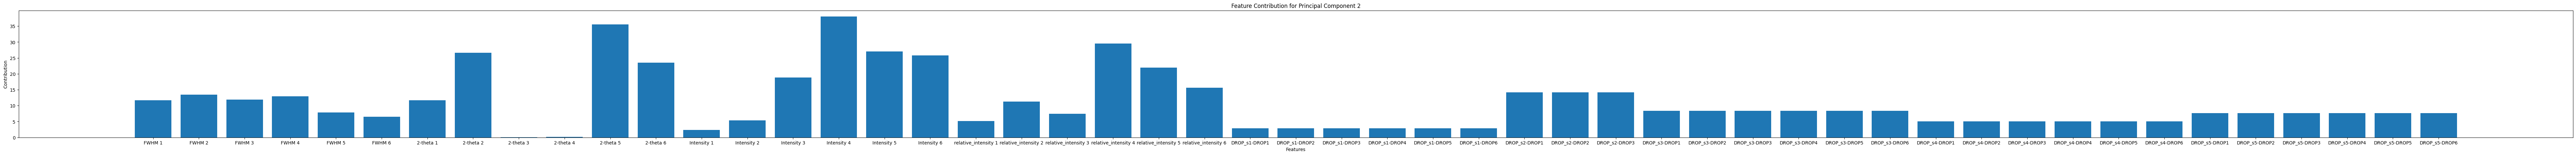

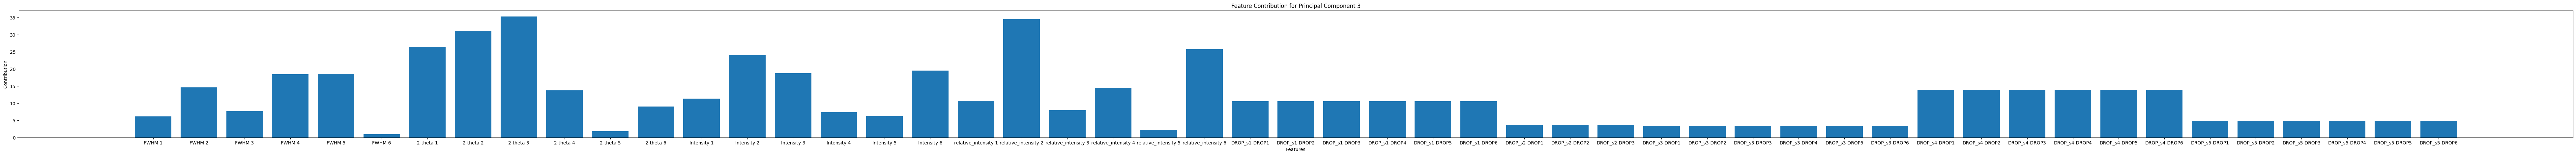

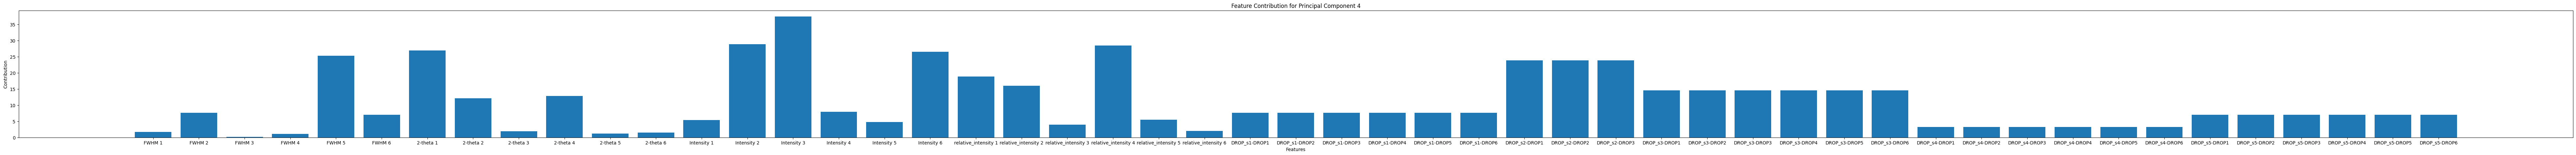

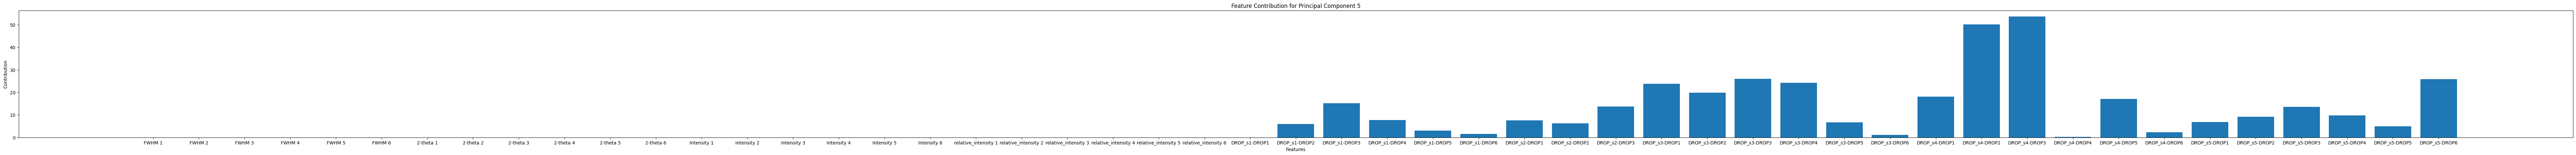

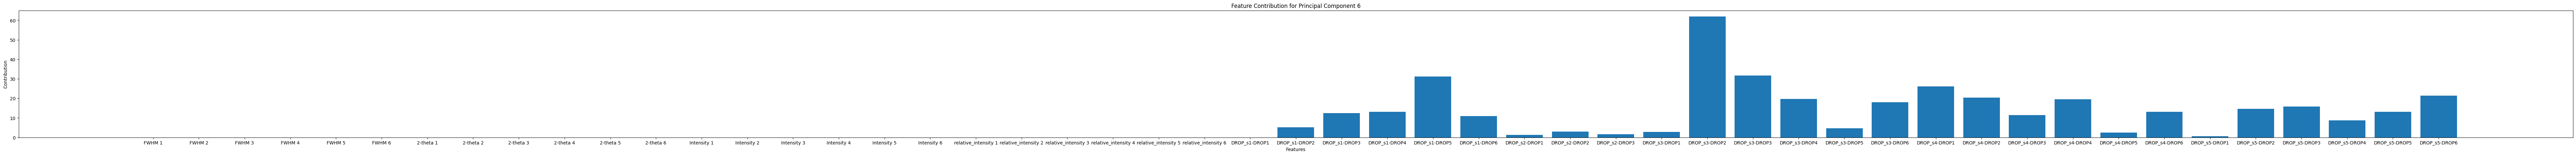

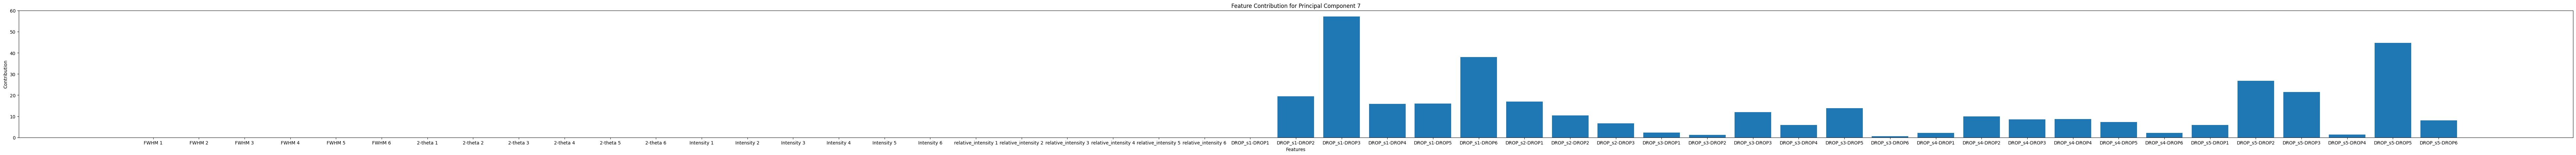

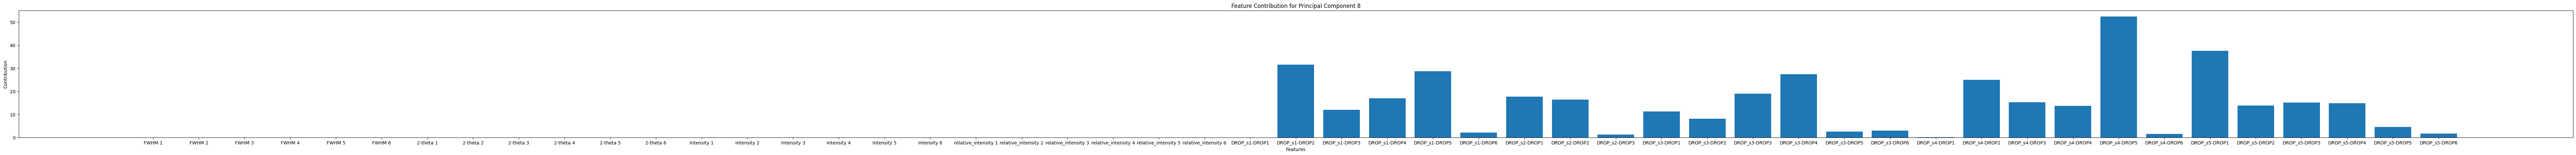

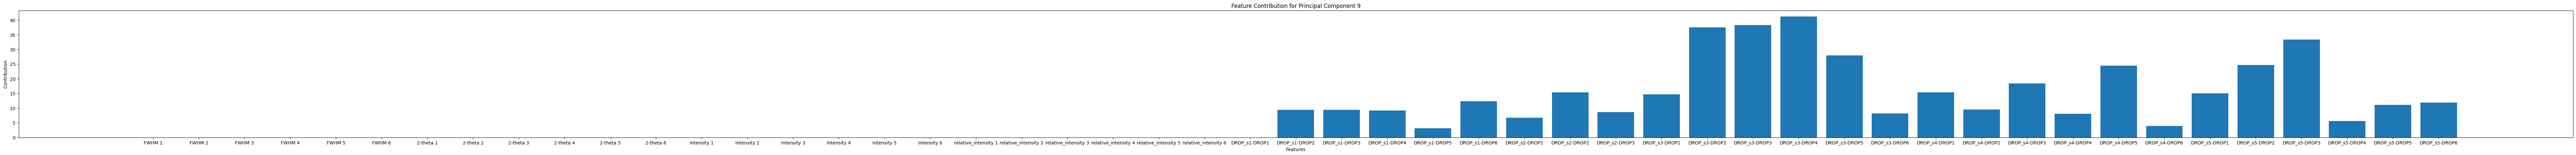

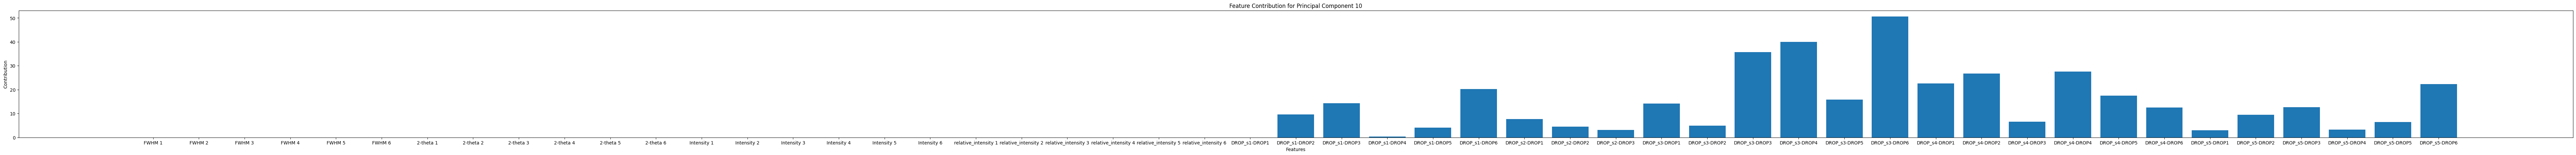

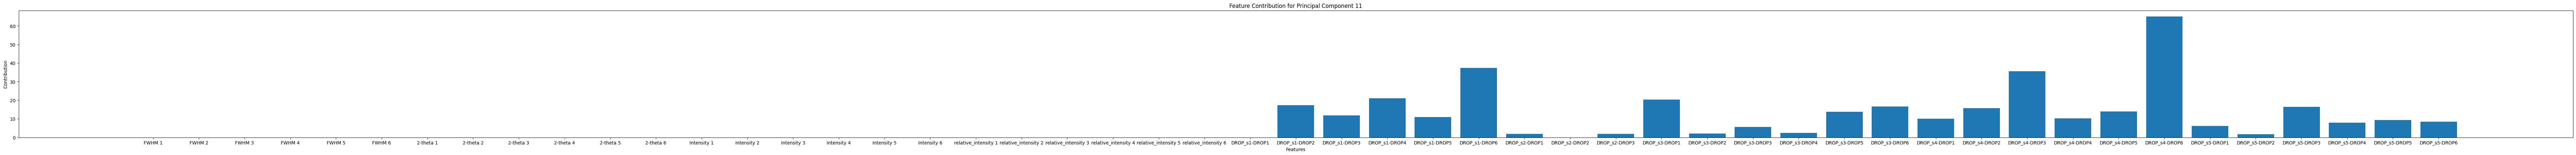

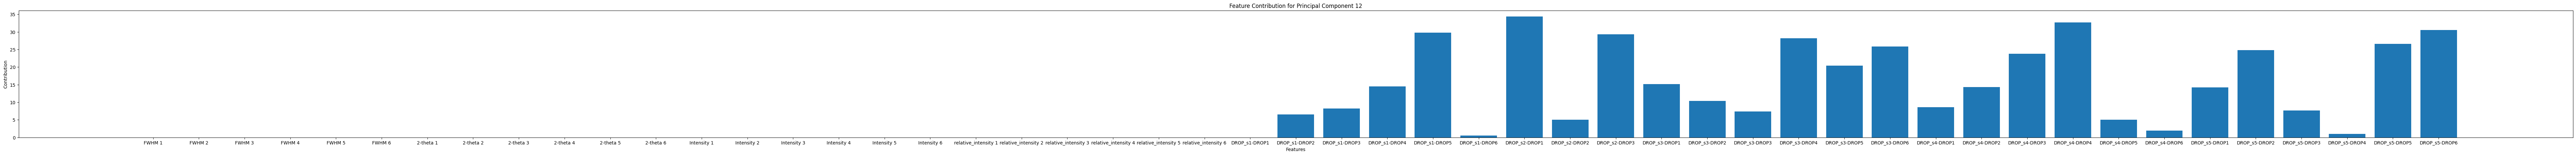

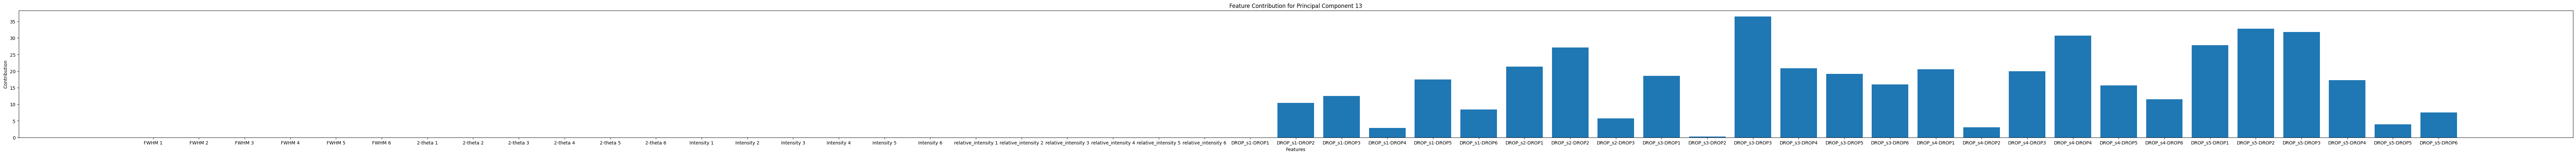

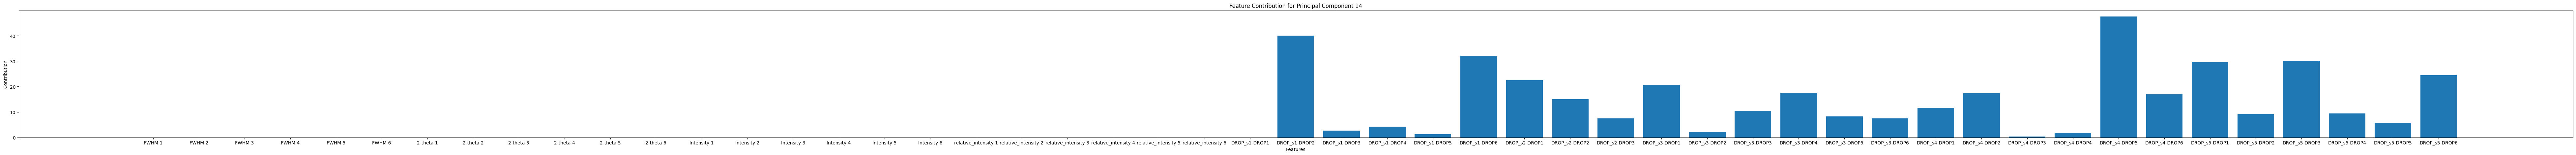

,Principal Component,feature contributions in descending order
0,PC1,"[FWHM 6, relative_intensity 3, Intensity 1, FW..."
1,PC2,"[Intensity 4, 2-theta 5, relative_intensity 4,..."
2,PC3,"[2-theta 3, relative_intensity 2, 2-theta 2, 2..."
3,PC4,"[Intensity 3, Intensity 2, relative_intensity ..."
4,PC5,"[DROP_s4-DROP3, DROP_s4-DROP2, DROP_s3-DROP3, ..."
5,PC6,"[DROP_s3-DROP2, DROP_s3-DROP3, DROP_s1-DROP5, ..."
6,PC7,"[DROP_s1-DROP3, DROP_s5-DROP5, DROP_s1-DROP6, ..."
7,PC8,"[DROP_s4-DROP5, DROP_s5-DROP1, DROP_s1-DROP2, ..."
8,PC9,"[DROP_s3-DROP4, DROP_s3-DROP3, DROP_s3-DROP2, ..."
9,PC10,"[DROP_s3-DROP6, DROP_s3-DROP4, DROP_s3-DROP3, ..."


In [ ]:
analyze_principal_components(x , 0.75 , 51 , 100, 5)# x=data   , n= variance% to capture ,   f=col number  , (a,b)=>fig size

📌df2

In [ ]:
x=df2.drop(['FF', 'schw 1', 'schw 2','schw 3', 'schw 4', 'schw 5', 'schw 6'], axis=1)
y=df2[['FF']]

In [ ]:
x.shape

(27, 25)

In [ ]:
get_num_components(x)

25

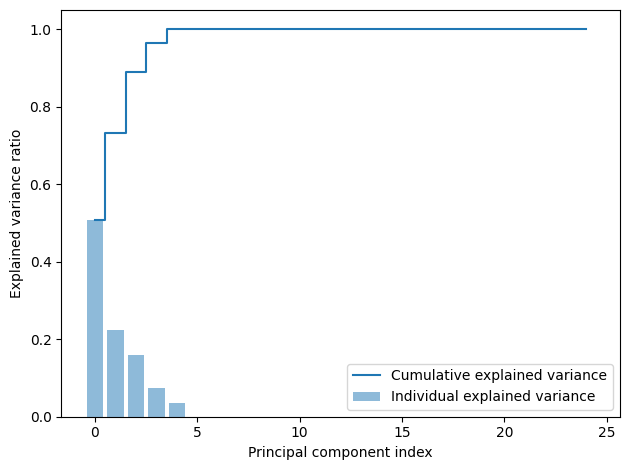

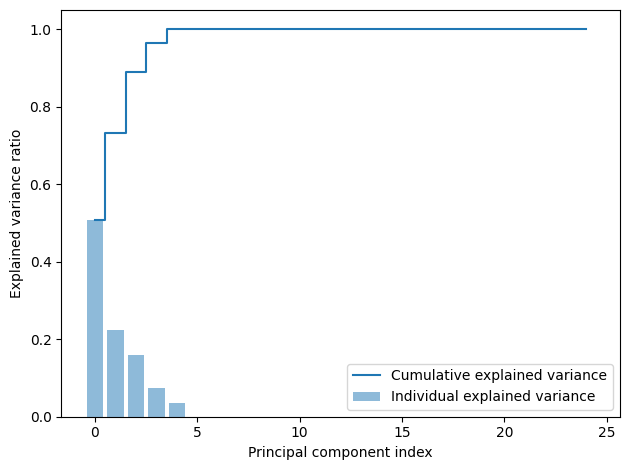

None
None


In [ ]:
output1 = visualize_variance_pca(x)
output2 = plot_explained_variance(x)
print(output1)
print(output2)

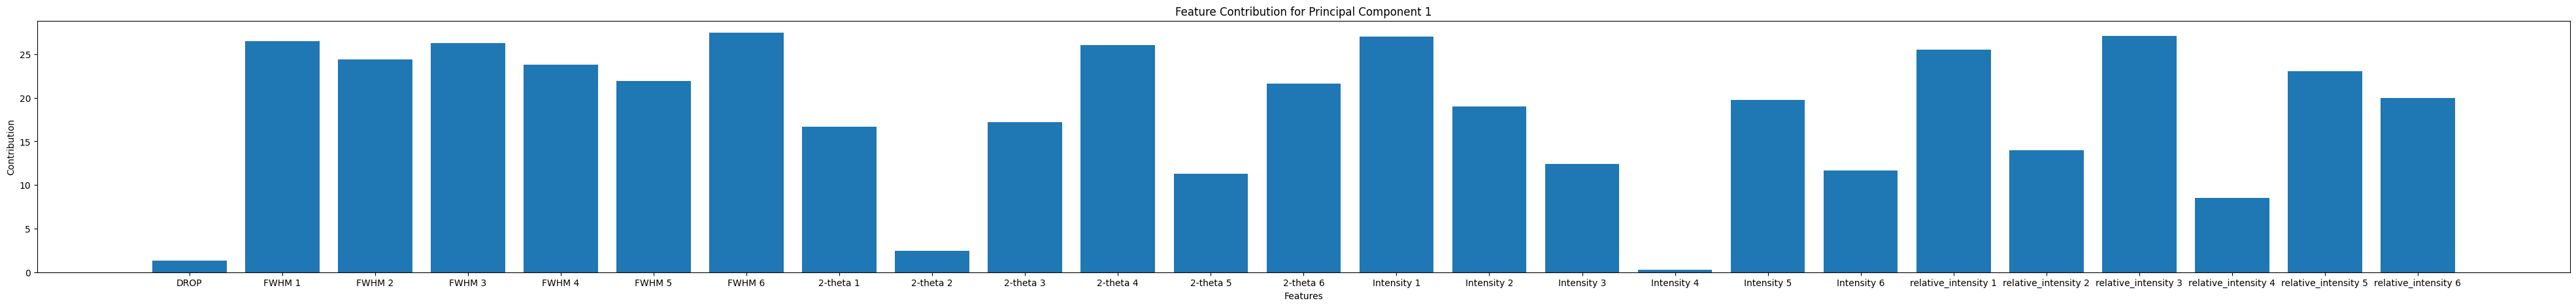

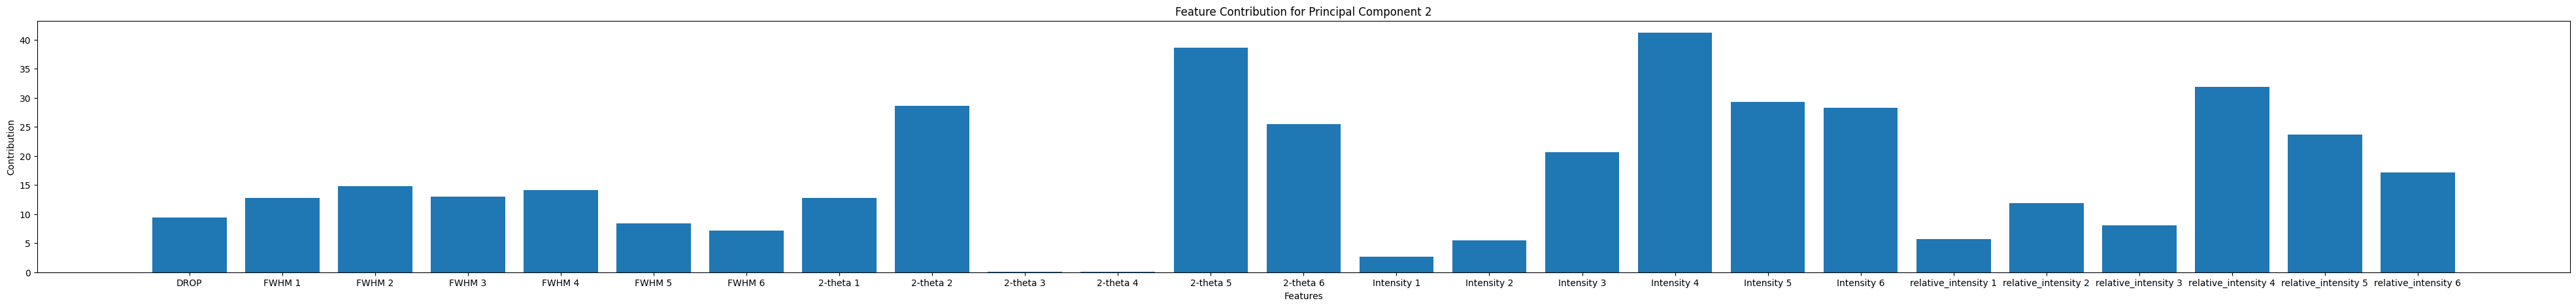

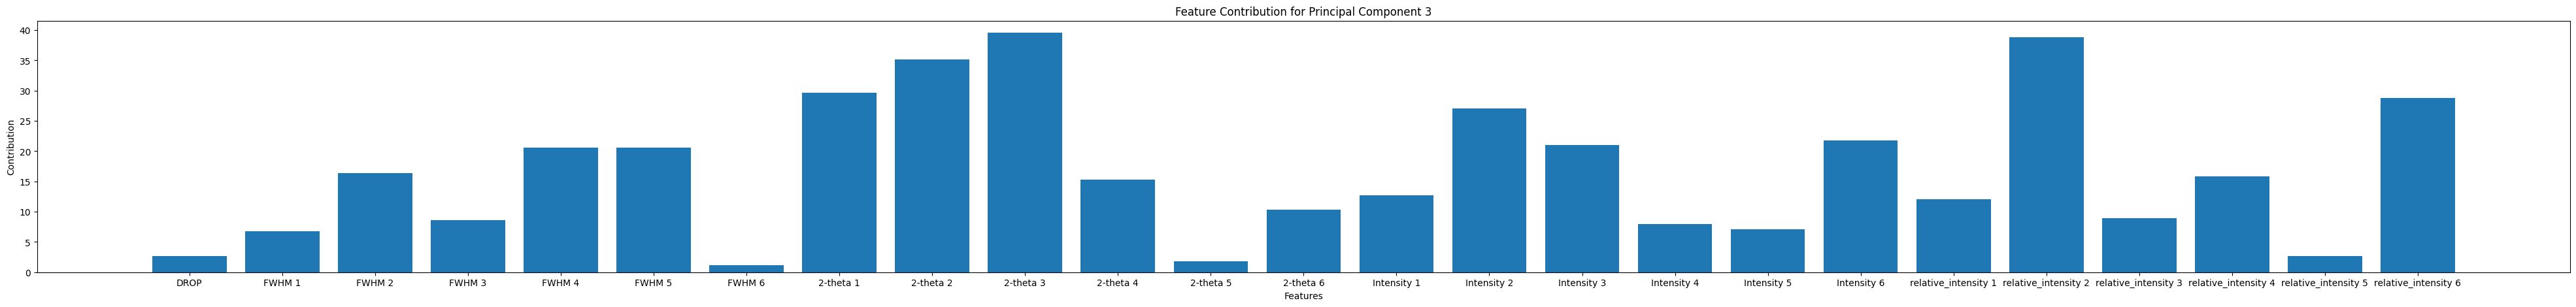

,Principal Component,feature contributions in descending order
0,PC1,"[FWHM 6, relative_intensity 3, Intensity 1, FW..."
1,PC2,"[Intensity 4, 2-theta 5, relative_intensity 4,..."
2,PC3,"[2-theta 3, relative_intensity 2, 2-theta 2, 2..."


In [ ]:
analyze_principal_components(x , 0.75 , 25 ,50,5)  # x=data   , n= variance% to capture ,   f=col number  , (a,b)=>fig size

**Best regression results after PCA (🔎 75% variance)**

📌df



In [ ]:
x=df.drop(['FF', 'schw 1', 'schw 2','schw 3', 'schw 4', 'schw 5', 'schw 6'], axis=1)
y=df[['FF']]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

pca = PCA()
pca_final = PCA(n_components=0.75) #
x_pca= pca_final.fit_transform(X_scaled)

CV=5

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=78)

In [ ]:
print('knn_regression result :', knn_regression(X_train, y_train, X_test, y_test))

knn_regression result : {'R-squared Score (Test)': 0.7521925951967859, 'R-squared Score (Train)': 1.0, 'RMSE': 0.870396390386306}


CV=OFF

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=78)

In [ ]:
print('GBR',gb(X_train, y_train, X_test, y_test))
print('---------')
print('KNN',KNN(X_train, y_train, X_test, y_test))

GBR {'best_params': {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 500}, 'best_r2_score_test': 0.5616862882983191, 'best_r2_score_train': 0.8640962081048026, 'rmse_train': 0.9355471456572094, 'rmse_test': 1.5481535041632362}
---------
KNN {'best_params': {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}, 'best_r2_score_test': 0.8496185275031811, 'best_r2_score_train': 0.9999999999998217, 'rmse_train': 1.0717060004742216e-06, 'rmse_test': 0.8665491863437617}


📌df1

In [ ]:
x=df1.drop(['FF', 'schw 1', 'schw 2','schw 3', 'schw 4', 'schw 5', 'schw 6'], axis=1)
y=df1[['FF']]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

pca = PCA()
pca_final = PCA(n_components=0.75) #
x_pca= pca_final.fit_transform(X_scaled)

CV=5

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=78)

In [ ]:
print('gbr result:',              gradient_boosting_regression(X_train, y_train, X_test, y_test))
print('------------------')
print('knn_regression result :', knn_regression(X_train, y_train, X_test, y_test))

gbr result: {'R-squared Score ( Test)': 0.5893729676815527, 'R-squared Score (Train)': 0.6629531580924828, 'RMSE': 1.120427371088279}
------------------
knn_regression result : {'R-squared Score (Test)': 0.7969924414023345, 'R-squared Score (Train)': 1.0, 'RMSE': 0.7878001255984559}


Cv=off

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=78)

In [ ]:
print('KNN',KNN(X_train, y_train, X_test, y_test))

KNN {'best_params': {'algorithm': 'auto', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}, 'best_r2_score_test': 0.7790495151266124, 'best_r2_score_train': 0.9999999999999979, 'rmse_train': 1.1735910385683972e-07, 'rmse_test': 1.1813775786383598}


📌df2

In [9]:
x=df2.drop(['FF', 'schw 1', 'schw 2','schw 3', 'schw 4', 'schw 5', 'schw 6'], axis=1)
y=df2[['FF']]

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

pca = PCA()
pca_final = PCA(n_components=0.75) #
x_pca= pca_final.fit_transform(X_scaled)

cv=5

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=78)

In [ ]:
print('knn_regression result :', knn_regression(X_train, y_train, X_test, y_test))

knn_regression result : {'R-squared Score (Test)': 0.7521925951967859, 'R-squared Score (Train)': 1.0, 'RMSE': 0.870396390386306}


cv=off

In [13]:
print('KNN',KNN(X_train, y_train, X_test, y_test))

KNN {'best_params': {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}, 'best_r2_score_test': 0.8496185275031811, 'best_r2_score_train': 0.9999999999989339, 'rmse_train': 2.6203722079357038e-06, 'rmse_test': 0.8665491863442324}


****Feature importance , SHAP Values**** 

In [18]:
df[['DROP']]

,DROP
0,1
1,2
2,3
3,4
4,5
5,6
6,1
7,2
8,3
9,1


In [14]:
x=df.drop(['FF', 'schw 1', 'schw 2','schw 3', 'schw 4', 'schw 5', 'schw 6'], axis=1)
y=df[['FF']]

X_train, X_test, y_train, y_test = split_and_scale_data(x, y, test_size=0.2, random_state=78)

🚀

In [17]:
param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
        }

model = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, np.ravel(y_train))
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

y_pred_train = best_model.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)
    
    # Get feature importances
feature_importances = best_model.feature_importances_
feature_names = x.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values('Importance', ascending=False)
    
evaluation_metrics = {
        'R-squared Score (Test)': r2,
        'R-squared Score (Train)': r2_train,
        'Best Hyperparameters': grid_search.best_params_,
        'Mean Absolute Error': mae,
        'Mean Squared Error': mse,
        'RMSE': rmse
    }
    
print("Feature Importance:")
print(importance_df)
print("\nEvaluation Metrics:")
print(pd.Series(evaluation_metrics))
    


Feature Importance:
                 Feature  Importance
0                   DROP    0.414850
22  relative_intensity 4    0.173869
16           Intensity 4    0.057848
18           Intensity 6    0.053261
24  relative_intensity 6    0.046421
14           Intensity 2    0.038637
12             2-theta 6    0.027796
11             2-theta 5    0.021782
13           Intensity 1    0.016197
8              2-theta 2    0.014387
7              2-theta 1    0.013058
9              2-theta 3    0.012970
20  relative_intensity 2    0.012799
3                 FWHM 3    0.011431
19  relative_intensity 1    0.011238
15           Intensity 3    0.010213
2                 FWHM 2    0.009811
10             2-theta 4    0.009682
4                 FWHM 4    0.009520
6                 FWHM 6    0.008849
1                 FWHM 1    0.006628
5                 FWHM 5    0.006468
17           Intensity 5    0.006456
21  relative_intensity 3    0.003727
23  relative_intensity 5    0.002102

Evaluation Metric

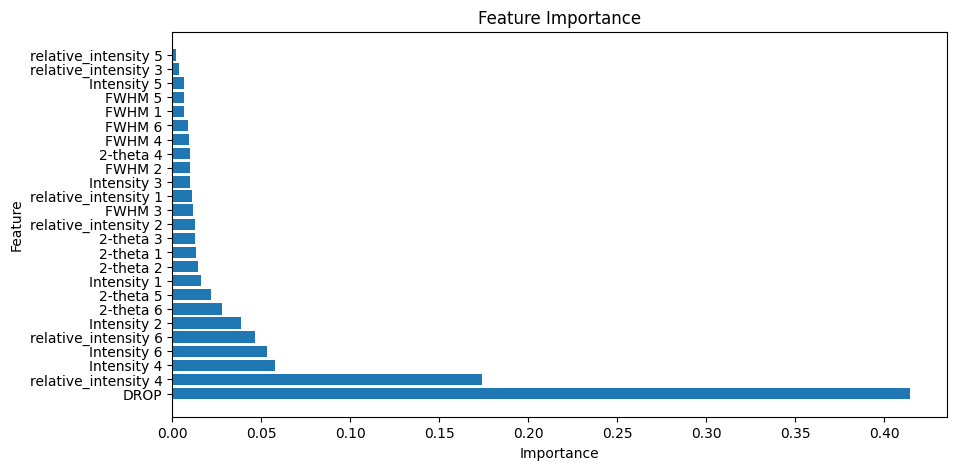

In [34]:
feature_importances = importance_df['Importance'].values
feature_names = importance_df['Feature'].values
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]
plt.figure(figsize=(10, 5))
plt.barh(range(len(sorted_feature_importances)), sorted_feature_importances, align='center')
plt.yticks(range(len(sorted_feature_importances)), sorted_feature_names)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


SHAP Values:


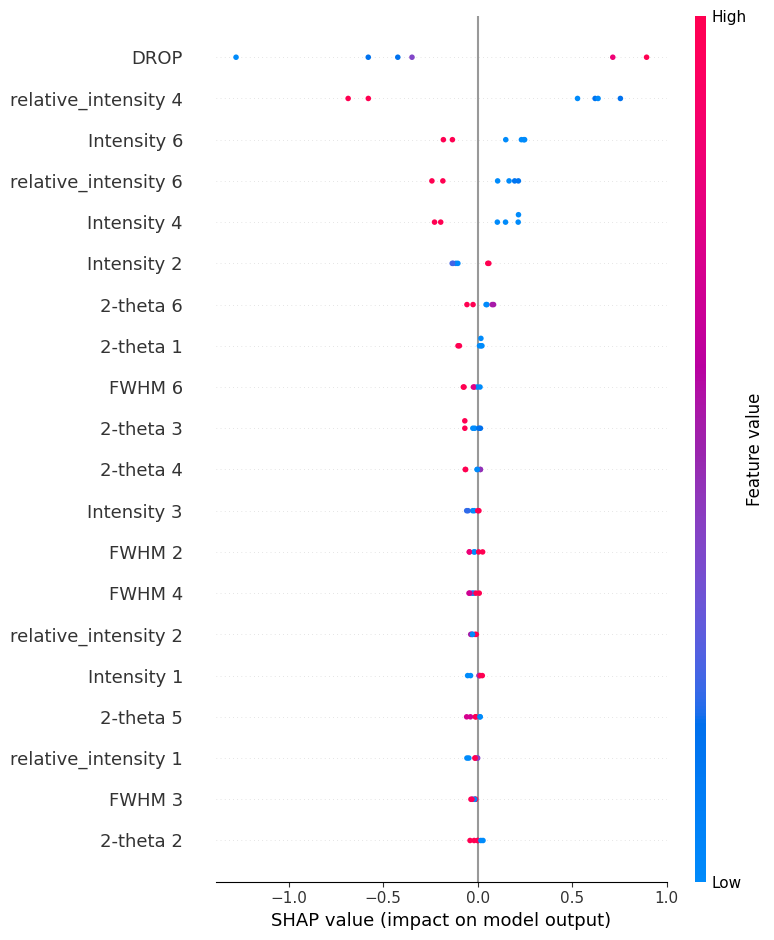

In [31]:
# Calculate SHAP values

explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)


feature_names = x.columns.tolist()
print("\nSHAP Values:")
shap.summary_plot(shap_values, X_test, feature_names=feature_names)

In [36]:
# Create a force plot
instance_index = 0  
shap.force_plot(explainer.expected_value, shap_values[instance_index], X_test[instance_index], feature_names=feature_names)



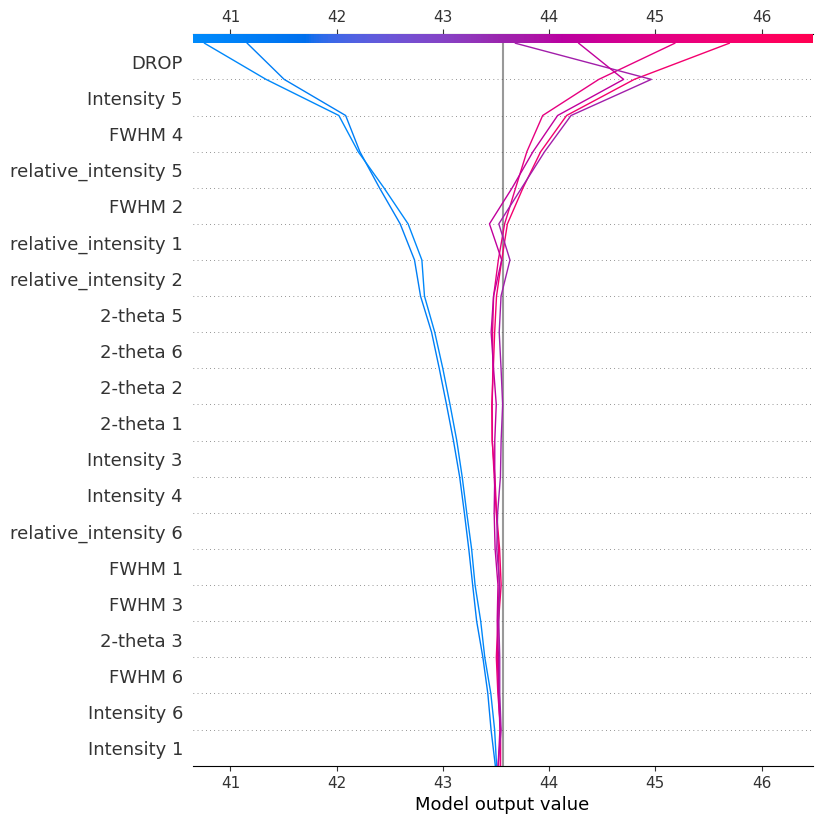

In [38]:
# Create a decision plot
shap.decision_plot(explainer.expected_value, shap_values, feature_names=feature_names)

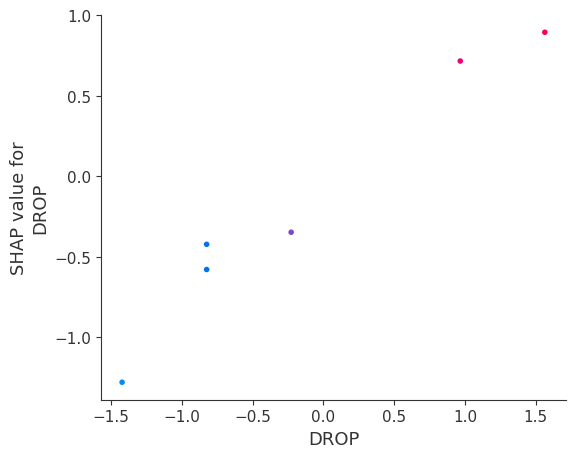

In [37]:
# Create a dependence plot
feature_index = 0  
shap.dependence_plot(feature_names[feature_index], shap_values, X_test, feature_names=feature_names)